In [132]:
import pandas as pd
import numpy as np
from climdist.data import load as load_df
import json
import gensim
import pyLDAvis
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from tqdm import tqdm
#import itertools

from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans

In [214]:
#nlp = spacy.blank('de')
#nlp.add_pipe('ruler', )

In [3]:
df = load_df('main', readability=True, heading2=False)

In [4]:
with open('../data/processed/entities_ruled.json', 'r', encoding='utf8') as f:
    ents_ruled = json.load(f)
#with open('../data/processed/entities.json', 'r', encoding='utf8') as f:
#    ents = json.load(f)

How big should the concordance window be for a text with multiple groups of entities?

In [5]:
def get_ent_distances(ents):
    
    distances = []
    
    for entry in ents:
        wea = entry['ents']['WEA']
        if wea != []:
            for ix, ent in enumerate(wea[:-1]):
                distances.append(wea[ix+1][1]-wea[ix][2])
                
    return distances    

In [6]:
def cluster_ents(wea, text):
    
    k_array = np.array([ent[1] for ent in wea]).reshape(-1,1)
    plot_array = [1 if char in k_array else 0 for char in range(len(text))]
    
    plt.plot(range(0, len(plot_array)), plot_array)
    plt.show()
    
    min_inertia = None
    best_k = 0 
    for k in range(1,3):
        kmeans = KMeans(k, random_state=42).fit(k_array)
        if min_inertia == None or min_inertia > kmeans_inertia:
            min_inerta = kmeans.inertia_
            best_k = k
            
    final_kmeans = KMeans(best_k, random_state=42).fit(k_array)
        
    return kmeans


def clustering_example(ents_ruled, df, n):
    while True:
        ix = np.random.randint(0, len(ents_ruled))
        sample = ents_ruled[ix]
        wea = sample['ents']['WEA']
        if len(wea) > n:
            print(wea)
            print(df.loc[sample['id']].full_text)   ### TODO: displacy
            k = cluster_ents(wea, df.loc[sample['id']].full_text)
            print(k.labels_)
            cont = input('Continue? [Y]/n ')
            if cont == 'n':
                break
        #else:
         #   pass


[['Sonnenschein', 283, 295], ['Sonnenschein', 339, 351], ['NNO', 356, 359], ['Sonnenschein', 814, 826], ['Sonnenschein', 870, 882], ['NNO', 887, 890]]
17 P8"
20 [28—И» 21 (28— 5 22 |28—5
4'
/&lt;Ч*Ю /6 28— 5 /8] ,2.4-lZ /6&gt;28- 5 /4 /O  ,&lt;&gt;]2S— 5 /8 ,0*15 /2)28— 5 ,6 J3°A)je8// 6'" /1 17 /0 28— 5 ,8 20 /0 28- 4 /9 21 /0128- 5 /8 119 ,Ь Л-* 5 ,2 13/2(28-4 ,» 15/0|28—4 /2 &gt;!&lt; 7°/3 &gt;bi: / 2 *13 /9 +t4 ,4 4из./3
ONO. Sonnenschein.
SSW. Sonnenblicle, dünne Wölket SSW.
S. } Sonnenschein. S- NNO. J
. N)iO. Windig, Sonnenblicf«,
O. Sonnenblicte, bezogen,

	17 P8"
20 [28—И»
21 (28— 5
22 |28—5
4'

	Ist z«'drucken «rlstubf. 3m Rame» der  in d«n Ostsce.Provmzen, Or. K. L. Grav,.

	Witterungs-Beobachtungen.

	/&lt;Ч*Ю /6 28— 5 /8]
,2.4-lZ /6&gt;28- 5 /4
/O  ,&lt;&gt;]2S— 5 /8
,0*15 /2)28— 5 ,6

	(Barom.-.Peob. im Zimmer bei * 16°, C.)

	J3°A)je8// 6'" /1
17 /0 28— 5 ,8
20 /0 28- 4 /9
21 /0128- 5 /8 119 ,Ь Л-* 5 ,2
13/2(28-4 ,»
15/0|28—4 /2

	ONO. Sonnenschein. SSW. Sonnenblicle, dü

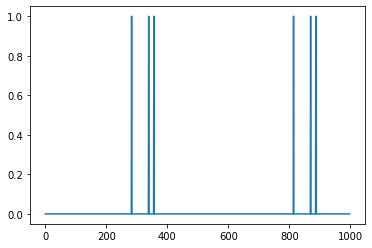

[1 1 1 0 0 0]
Continue? [Y]/n y
[['Regen', 977, 982], ['Schnee', 1042, 1048], ['Regen', 1713, 1718], ['Schnee', 2153, 2159]]
»itaetdMt der «eteorolsgijche« Stativ» tan Imtuu« Odservatcrium in Petersburg. 4. «&gt;ve»ber IBS7.

	9&gt;t otimrty Ii5
1hl ■ia sfl 5*
J5L
0- 19 A В ;
*f *S •I i *'i ?
I
700 -f «—» «Ts»,«
mm.
ii ii
– –
t i
«od» 46,8 W.2 4 + 2 Hchparunda .. 46,8 — б — 8
-f 2,2 75 3
ЛЛЯГ /,» inV'. -M -4,0
100 •
 ..
Helfingfor» .. Petersburg ..
H-lfingfer» .1 60,0 WCW.3 2 -4. Petersburg ..I 60,* «w.5 3 – «, Stockholm ...! 6&lt;3 WSW,? I —S. 82 0 75 0
Stockholm ... -M
S» 0
ek»deSn»,...
StirirtuAi... 61,2 6,8 4 +4.
mm 61,7 N«.6 1 -1, Riet 64,2 — 0-14, ИЪаи 66,0 0,0 0 -6
+M -1,4 77 9» 88 1 -14,8 10 0 -в,»
78 0
Warschau
Warschau.... 60.6 ««ls,8 в -8
MoSta» 58.8 «0.1 6 8,
-8,3
8.6
14 В
«rj.af ~~ 96 Ж
l'lJlilfl»
©Tjanlt....
»»Slow
fhiontl.... 63,0 — 6 +0
K,4lo« 575 »,? в 0 »iew 526 O«O,0 6 -f 0
+ 0,1
0,1
+ 0.6
100 15 —
100 11
ieiew
58 4
«hartow ... 55,7 6,2 4 +4
5-liffav-tgrao 63,6 WSW.0

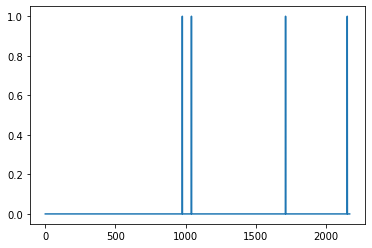

[1 1 0 0]
Continue? [Y]/n 
[['Ostwind', 1302, 1309], ['Wärme', 1414, 1419], ['Nordostwind', 1673, 1684], ['Wetter', 1756, 1762]]
Telegramme.

	Berlin,«. Novbr. (27. Octbr.). (Originaltelegramm der .Rig. Ztg.') Kaiser Wilnelm ist erkrankt. Ein heute ausgegebenes Bulletin meldet die Fortdauer der Unpäßlichkeit. — Die Kaufmannschaft hat den Antrag gestellt. Beleihunaskassen für Waaren einzurichten. — Graf
 soll d« vtt»eh«e« nach seinen
Rücktritt zu nehmen beabsichtigen.
Der Ausschuß der Versailler Nationalversammlung zur Berathung über die Verlängerung der Reglerungsgewalt Mac Motion's ist gewählt und in feiner M 'jorität regierungsfeindlich, (f. u.) Im Ministerium ist in Folge dessen eine Krisis entstanden. Die Republikaner und die Bonapartisten haben ein allgemeines Plebiscit beantragt. Eine Masse von Amendements ist angelaufen, die Berathung scheint sich sehr zu verzögern.
'Versailles, 7. November (26. October). (Rig. T.-A.) In der Commission zur Prüfung des Vorschlages Ehangarnier'S (

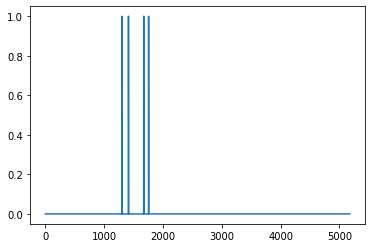

[1 1 0 0]
Continue? [Y]/n 
[['Nordwind', 1408, 1416], ['Sturm', 1491, 1496], ['Wolken', 1532, 1538], ['WindeS', 2360, 2366], ['Stoß', 2418, 2422]]
Das Erdbeben auf Rhodus.

	Giebt es in der Welt eine schrecklichere Heimsuchung, als die Katastrophe, die wir hier zu schildern versuchen wollen? Am
*) AuS der „AugSb. Allg. Ztg."

	-22. April d. 1.. um halb 11 Uhr Abends, hat ein heftiger Erdstoß die Insel RhoduS in den bedauernswürdigsten Zustand versetzt. Die von dieser Naturerscheinung angerichteten Verwüstungen sind groß. Ganze Dörfer sind zerstört; überall herrscht Trostlosigkeit, überall stößt man auf verhangnißvolle Spuren dieser Geißel der Mensch« heit. Zwanzig Secunden kaum haben hingereicht, um diese Zer« störungsarbeit zu vollbringen. Zwanzig Secunden find die Zeit, welche das Erdbeben gebrauchte, um aus der Insel Rhodus fast nur einen Trümmerhaufen zu machen. Hier sind Hauser eingestürzt, dort liegen unter dem Schutt begrabene Opfer, überall trifft man die gleichen herzzerreißen

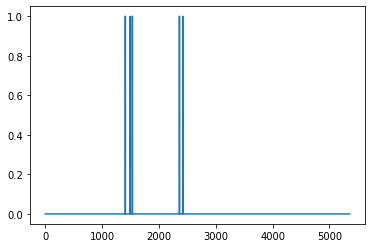

[1 1 1 0 0]
Continue? [Y]/n 
[['Orkan', 8193, 8198], ['Nordwest', 8203, 8211], ['Wind', 8964, 8968], ['Orkans', 9005, 9011], ['Nebel', 14026, 14031]]
Riga, 10. October.
Zum deutsch-russischen Güterverkehr.
Ueber die Resultate der in der Zeit vom 1. bit 3. October a. St. in Frankfurt a. M. abgehaltenen Generalconferenz der russischen, französischen, belgischen und deutschen Bahnen haben wir tn Nr. 232 unserer Zeitung nach Mittheilungen, die un&lt; von competenler Seite zugegangen waren, bereits berichtet. Gegenwärtig entnehmen wir der „Franks. Ztg.' noch Folgendes über die in Frankfurt stattgehabten Verhandlungen:
«m 13. (I.) October trat zunächst die für die Vorbereituvg von Beschlüssen gevcihlre Commission zusa«me.i, bestehend au» Lertietern der große» rufst, ichen Eisenbahn, der Mo«kau-Brefler, der Warschau« Wien-B,omberger, der sZchfisch.'N Staat«bahnen. der hanno»erschiN Staatsbahn, der oberschlenschen und der rheinischen Eisenbahn. Jet der am 14. d Mt«. b,. gonnenen Generalconsere

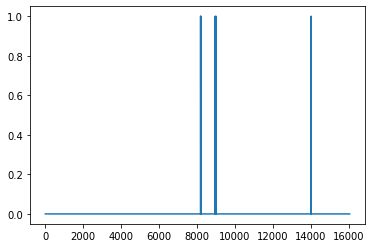

[0 0 0 0 1]
Continue? [Y]/n 
[['Wetter', 1861, 1867], ['Kälte', 7389, 7394], ['Sturm', 7511, 7516], ['Wind', 7532, 7536], ['Wind', 7687, 7691], ['Witterung', 7731, 7740], ['Kalte', 7758, 7763], ['Witterung', 7855, 7864]]
Telegramme.

	Petersburg, den ,4. April, (N T-A.) Nach dem in Anlaß deS Besrckcs Er lviaj. des deutschen Kaiser« jetzt veröffentlichten Programm wird St. Majestät Kaiser Alexander morgen Seinem hohen «Aaste bis Gatschina entgegen sahren und nach der Begrüßung das Geleit in d«c Residenz geben. Nachmittags ist Familientafel im Winterpalais. Montag findet ftamilientasel bei Sr. Kaiscrl. Hoheit dem Großfürsten Thronfolger statt. .Am Dinstag, als am Geburt-feste Er. Majestät unseres Herrn und Kaisers. wird, nach großem Gallaempfang bei Hof. eine Militairparade stattn »den und tie Hamilientafel im Winter-Palais sein. Abends aber der nroße Zapfenstreich ausgeführt werden. Am Mittwoch findet nach der Mittagstafel im Winterpalais ein Ball in der Eremitage statt. Am Donnerstag i

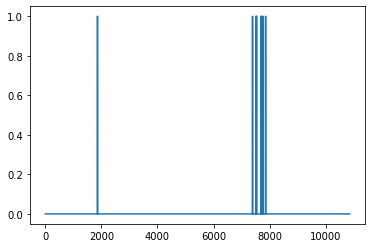

[1 0 0 0 0 0 0 0]
Continue? [Y]/n 
[['Gewitter', 1310, 1318], ['Hitze', 1395, 1400], ['Wirbelwind', 1438, 1448], ['Wolken', 1457, 1463], ['Gewitter', 1511, 1519], ['Regens', 1546, 1552], ['Donnerschläge', 1598, 1611], ['Gewitter', 1648, 1656], ['Blitzschlag', 1723, 1734]]
Locales.

	— (Im Circus Cmi selli) findet morgen, Eonnadend. das Benefiz für die beliebte Künstlerin Miß Z e nobia statt. Das Programm wird mannigfache neue Nummern enthalten; wie man uns mittheilt, wird die Benefiziantin zum ersten Mal auf ungesatteltem Pferde reiten. Am Sonntag finden wiederum zwei Vorstellungen statt. ,î »
— (Schwimmunterricht.) In unserem Blatte ist von mehreren Seiten wiederholt die Ertheilung von Schwimmunterricht' am hiesigen Orte in Anregung gebracht worden. Gegenwärtig theilt uns der Schwimmlehrer Herr Hagen mit, daß er dem wiederholt geäußerten Wunsche entgegenzukommen bereit sei. und zwar bittet er. speciell darauf hinzuweisen, daß er einen Ertracursus für Knaben zu arrangiren beabsichtige.

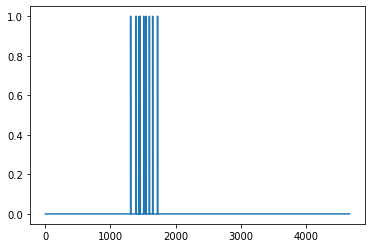

[1 1 1 1 1 0 0 0 0]
Continue? [Y]/n 
[['Sturm', 330, 335], ['Schnee', 450, 456], ['Flocken', 468, 475], ['Wind', 568, 572], ['Regen', 582, 587], ['Sonnenschein', 592, 604]]
Paris. Die Meteorologie von Paris hat heute von Mitternacht bis Mittag eine Reihe außerordentlicher Erscheinungen zu verzeichnen. Die Magnetnadel war in beständiger Bewegung, das Quecksilber des Barometers stieg und fiel beständig um 2 bis 3° und das Thermometer wechselte in einer Stunde um 8 Lin. Um Mitternacht beschädigte ein Sturm die Dächer und Denkmale, um 6 Uhr morgens fror es, und um 8 Uhr schien die Sonne hell und rein, um 9 Uhr fiel der Schnee in dichten Flocken, um 10 Uhr begann es zu haaeln und zu regnen, und um 12 Uhr mittags erhob sich 'ein starker Wind, der mit Regen und Sonnenschein abwechselte.
Ist zu drucken erlaubt. Im Namen des General-Gouvernements von Liv-, Esth- und Kurland, Coll-Assess. B. Poorten.

	Feuilleton.

	Berlin. Im Jahre 1852 entwendeten zwei Lehrburschen ihrem Meister eine Quantität

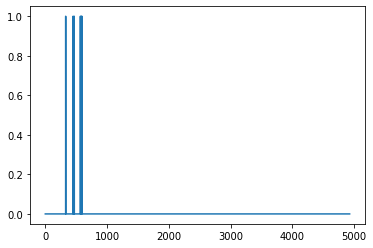

[1 1 1 0 0 0]
Continue? [Y]/n 
[['Wolken', 585, 591], ['Fluth', 1026, 1031], ['Wolken', 1681, 1687], ['Nebel', 1841, 1846], ['Wolken', 1963, 1969], ['Nebel', 1974, 1979], ['Wolken', 2051, 2057], ['Wolken', 2234, 2240], ['Wolken', 3413, 3419], ['Frost', 4844, 4849], ['Wärme', 4971, 4976], ['Schnee', 4986, 4992], ['Witterung', 7900, 7909]]
Ein Paar Bilder aus der Schweiz.

	(Eingesandt von fctui Herrn Major Wangenheim v. Qualen.)
Geneve — Lausanne — Vevey — Montrcur und du lieblich blauer Genfersee, an dessen von schneebedeckten Alpen umrahmten Ufern schon Italiens milde Lüfte wehen und der immergrüne Lorbeer und die Myrrhe blühen, — kleine« freundliche« Stück Erde mit deiner großartigen Natur; spiegeltlarcr See. stille ländliche Ruhe, nimmer werden wir euch vergessen! Wohl aber brausen auch oft die Wogen de» Leman« und brechen sich schäumend am Gestade; da« schneebedeckte Haupt de« Montblanc verbirgt sich in den Wolken und auf der Rousseau«lnsel in Genf sitzt der alte grie«grämige Jean 

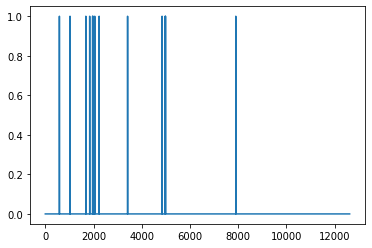

[0 0 0 0 0 0 0 0 0 1 1 1 1]
Continue? [Y]/n 
[['Frostes', 1464, 1471], ['Wind', 1484, 1488], ['Hagel', 1494, 1499], ['Schnee', 1504, 1510], ['Wind', 1574, 1578], ['Schnee', 1587, 1593]]
London, den 18. April.

	Der heutige „Courier" enthält in Bezug auf bis Krönungs-Ceremonie einen Aufsatz mit der Ueberschritt „Küssen oder Nichtwissen, das ist die Frage!"
Der Russische Gesandte, Graf Pozzo di Borge, hat das Unglück gehabt, daß ihm,, bei einem Besuche bei Lord Holland, der mit Rollen versehene Lehnsessel, in welchem dieser, seiner Gicht wegen, sich umherfahren lassen muß, über den Fuß gefahren wurde. Der Graf ist' dergestalt verletzt- worden, Щ er das Zimmer hüten muß.
Einiges Aufsehen hat hier die bekannte, von der Hannoverschen Zeitung dem Herzoge v. Cambridge in den Mund gelegte Rede hervorgebracht, in welcher derselbe der Gerechtigkeit und Milde seines Bruders, des Königs von Hannover, besonders Lob gespendet haben soll. Man wundert sich natürlich, daß ein,' unter den gegenwärtigen 

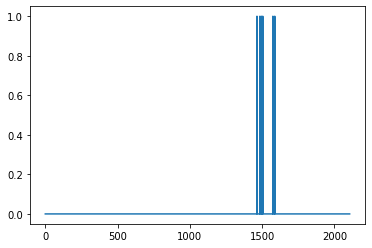

[0 0 0 0 1 1]
Continue? [Y]/n 
[['Witterung', 849, 858], ['Sturm', 4359, 4364], ['Witterung', 5030, 5039], ['Regen', 5069, 5074]]
— (D i e Capelle des preußischen Cadettencorps,) welche unlängst hierin Schwarz' Concerthaus einige Wochen lang concertât und sich von hier nach Moskau begeben hat, sollte, laut Mittheilung einer dortigen Zeitung, der „Sowr. Jswest." aus Moskau durch die Obrigkeit ausgewiesen worden sein, und zwar weil zwei MitgUeder der Capelle sich in einer Restauration geweigert hätten, einigen Offizieren des Petersburger Ulanenregiments die gebührenden militairischen Ehren zu erweisen. Dagegen schreibt die „Moskauer deutsche Zeitung", daß diese ganze Mittheilung eine Unwahrheit sei, indem wohl ein heftiger Streit in jener Restauration stattgesunden habe, der aber ebenso wenig durch irgend welches Thun oder Lassen preußischer Musiker veranlaßt worden sei, als diese Capelle Moskau zufolge irgend einer Ausweisung verlassen habe, daß vielmehr ungünstige Witterung und die dur

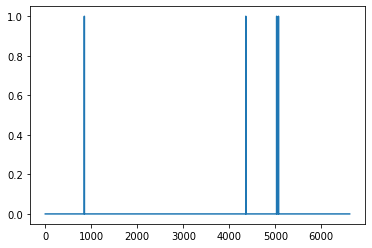

[1 0 0 0]
Continue? [Y]/n 
[['Nordwestwind', 590, 602], ['Südwinde', 1916, 1924], ['Windstille', 1933, 1943], ['Witterung', 1952, 1961], ['Witterung', 2328, 2337], ['Wind', 2382, 2386]]
Telegramme.

	Berlin, 23. ill.) Februar. (Originaltelegramm der .Ria. 3tg.') Dem Bundesrath ist die Vorlage eines Internirunasgesetzes zugegangen. — Der Kronprinz von Dänemark lft in Perlin eingetroffen. — Die Commission des Abgeordnetenhauses bat den Antrag gestellt, dem Ehegesch in Verfassung des Herrenhauses beiìustilnmcn. — Aus den Reichslanden sind verichiedene Proteste gegen die Erklärung des Bistl)oss Räß im Reichstage erhoben worden.
Die Carlisten haben Vinaroz (Valencia) desetzt. Vor Bilbao hat fich die Sachlage nicht verändert.
Domesnees, 10. Februar, 9 Uhr Morg. Schwacher Nordwestwind. Barometer am 9. Februar. 8 Uhr Abd«., 29—69, am 10. Februar. 8 Uhr Morgen«. 29—67. Thermometer 0 Grad, bewölkter Himmel, î Der Eisstand ist unverändert.
Petersburg, 8. Februar. ißig. T..A., 3 M. auf London 32%»

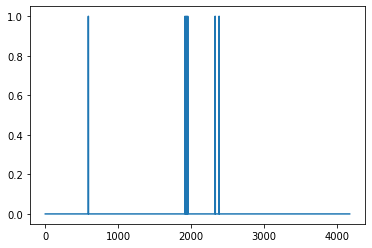

[1 0 0 0 0 0]
Continue? [Y]/n 
[['Gewitter', 114, 122], ['Wolkenbruch', 124, 135], ['Regen', 158, 163], ['Stegen', 1079, 1085]]
Bern, 6. Juni. (A, Z) Der große Rath von Tessin hat das Fremdengesetz angenommen; es tritt am 1. Juli in Krast. . Gewitter. Wolkenbruch und lange andauernder Regen haben über einzelne Gegenden des Kantons großes Unglück gebracht; besonders die Amtsbezirke Trachselwald. Konolftngen. Sehwarzenburg, das Seeland und der lura sind schwer heimgesucht worden. Bache wurden zu reißenden Strömen; Brücken und Schwellen wurden weggerissen, sinndenweite Strecken Landes in einen See verwandelt. An vielen Orlen lösten sich Erdlawinen ab, die sich 50 Schritte und weiter bewegten, Malten- und Pflanzland verschütteten, die Straßen haushoch mit Erde bedeckten, Häuser und Stallungen zertrümmerten. Menschen und Thiere wurden theils lebend, theils todt aus dem Schlamm hervorgezogen. Zwischen Wasen und Sumiswald ist dos Unglück am größten. Die Straße ist nebst vier Gebäuden, worunte

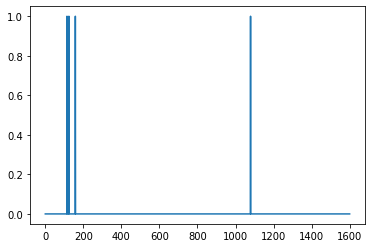

[0 0 0 1]
Continue? [Y]/n n


In [216]:
clustering_example(ents_ruled, df, 3)

Looks like 1000 chars is a good estimate for the average distance between different descriptions in the same text. Try a concordance window of 200.

In [7]:
def spans_from_text(ix, df, ents, window, distance, remove_ents=False):
    
    text = df.loc[ix].full_text
    wea = ents[ix]['ents']['WEA']
    spans = []
    
    if len(wea) == 1:
        start = wea[0][1]-window if wea[0][1] > window else 0
        stop = wea[0][2]+window if wea[0][2]+window < len(text) else len(text)
        spans.append((start, stop))
    
    elif len(wea) > 1:
        inside = False
        for i, ent in enumerate(wea):
            #print(i, ent)
            #print(inside)
            
            if i == len(wea)-1:
                #print('1')
                if inside == False:
                    start = wea[i][1]-window
                stop = wea[i][2]+window if wea[i][2]+window < len(text) else len(text)
                spans.append((start, stop))
                break
                
            if inside == False:
                #print('2')
                start = wea[i][1]-window if wea[i][1] > window else 0
                inside = True
                if wea[i+1][1]-wea[i][2] > distance:
                    #print('2.1')
                    stop = wea[i][2]+window
                    inside = False
                    spans.append((start,stop))
                    
            else:
                #print('3')
                if wea[i+1][1]-wea[i][2] > distance:
                    #print('2.1')
                    stop = wea[i][2]+window
                    inside = False
                    spans.append((start,stop))
    
    
    if remove_ents == True:
        
        wea_ranges = []
        for ent in wea:
            wea_ranges += list(range(ent[1],ent[2]))
            
        results = []
        for span in spans:
            span_text = ''
            for char in range(span[0], span[1]):
                if char not in wea_ranges:
                    span_text += (text[char])
            span_text = span_text.replace('  ', ' ')
            results.append(span_text)
        
        return results
                    
    else:
        return [text[span[0]:span[1]] for span in spans]

In [41]:
spans_from_text(125658, df, ents_ruled, 50, 200, remove_ents=True)

['ise angetreten hätte. Dazu stimmte vollkommen das des ersten Reisetages. Der Himmel war grau, und ein nicht eben seiner träufelte auf die durstige Erde und auf das Zeltdach deS raschen Dampfers, der mich nach Köln trug. Allmälig beliebte es diesem Zeltdache, dem freien Durchgang aus Hüte und Röcke zu gestatten.',
 'n, der die Welt gesehen, vielfach dem Wechsel der ausgesetzt war, aber auch in den Strudeln des Leb',
 ', smmer waren ste glücklich. Nur einmal faßte ein das Schiff im Canale und wars es mit solcher Gewa',
 'und bringt dadurch den Schiffen, wenn nämlich der aus bläst, große Gefahr.\nVerhaegen kam in einer stockfinsteren Novembernacht aus die Höhe von Ostende. Genau bekannt mit den Gefahren bei seiner Vaterstadt, suchte er das hohe Meer zu halten; allein der , welcher die schauerlichen Tiefen des Meeres aufwühlte, wurde je länger, je heftiger und wilder. Ein entsetzlicher riß den Hauptmast hinweg, daß er eiligst gekappt ',
 ' Gefahr erkennen, denn das Schiff nahte bei hoher

In [8]:
wea = ents_ruled[125658]['ents']['WEA']

In [17]:
wea_ranges

[348,
 349,
 350,
 351,
 352,
 353,
 425,
 426,
 427,
 428,
 429,
 574,
 575,
 576,
 577,
 578,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 4938,
 4939,
 4940,
 4941,
 4942,
 6223,
 6224,
 6225,
 6226,
 6227,
 6233,
 6234,
 6235,
 6236,
 6237,
 6238,
 6239,
 6240,
 6441,
 6442,
 6443,
 6444,
 6445,
 6446,
 6447,
 6448,
 6449,
 6450,
 6451,
 6452,
 6453,
 6570,
 6571,
 6572,
 6573,
 6924,
 6925,
 6926,
 6927,
 6928,
 7813,
 7814,
 7815,
 7816,
 7817,
 7824,
 7825,
 7826,
 7827,
 7828,
 8076,
 8077,
 8078,
 8079,
 8080,
 8081,
 12042,
 12043,
 12044,
 12045,
 12046,
 12047,
 16735,
 16736,
 16737,
 16738,
 16739,
 17682,
 17683,
 17684,
 17685,
 17686,
 17687,
 17699,
 17700,
 17701,
 17702,
 17703,
 17704,
 17878,
 17879,
 17880,
 17881]

In [30]:
def concordances_example(ents_ruled, df, n):
    while True:
        ix = np.random.randint(0, len(ents_ruled))
        #print(ix)
        sample = ents_ruled[ix]
        wea = sample['ents']['WEA']
        if len(wea) >= n:
            print(sample, '\n')
            spans = spans_from_text(ix, df, ents_ruled, window=100, distance=200, remove_ents=False)
            for num, span in enumerate(spans):
                print('----', num, '----', '\n', span, '\n\n\n')
            cont = input('Continue? [Y]/n ')
            if cont == 'n':
                break
        else:
            pass

In [31]:
concordances_example(ents_ruled, df, 3)

{'id': 261444, 'date': '1881-10-23', 'ents': {'WEA': [['Nebel', 1907, 1912], ['Schneegestöber', 1917, 1931], ['Witterung', 4755, 4764], ['WindeS', 4873, 4879]]}} 

---- 0 ---- 
 d der Durchfahrt durch die Magellandstraße und ihre ver« schiedenen Kanäle werden die Dampfer durch Nebel und Schneegestöber häufig angehalten, direct die Reise fortzusetzen/ die Vorficht gebietet eS unter

	Feuerländer.

	d 



---- 1 ---- 
 hSlos. Männer. Frauen und Kinder gehen einher, wie Gott sie erschaffen. AIS Schutzmittel bei rauher Witterung dient ihnen ein Seehundsfell, welches sie mittelst einer Sehne am Halse befestigt, je nach der Richtung deS WindeS, entweder auf der Brust oder auf dem Rücken tragen. Auch die Frauen gehen nackt und daS Gefühl der  



Continue? [Y]/n 
{'id': 98434, 'date': '1849-07-23', 'ents': {'WEA': [['Sturme', 6662, 6668], ['Regen', 6686, 6691], ['Witterung', 6797, 6806]]}} 

---- 0 ---- 
  größte Theil der feindlichen Geschütze wäre sicher in unsere Hände gerathen, wenn bei d

### Creating the corpus for LDA

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('../data/models/word2vec_251021/w2v_model.txt')

In [78]:
def create_corpus_stopwords(model, path, n, max_len):
    
    candidates = model.index_to_key[:n]
    original = candidates
    processed = []
    
    candidates = [word for word in candidates if 1 < len(word) <= max_len and word.isalpha() == True]
            
    print(f'{n-len(candidates)} candidates removed (not alphabetical or len == 1)')
    
    for i, word in enumerate(candidates):
        print('\n', word)
        stopword = input('Stopword? [y]/[N] ')
        if stopword != 'y':
            candidates[i] = None
            
    candidates = [word for word in candidates if word != None]
    
    with open(path, 'w', encoding='utf8') as f:
        json.dump(candidates, f)

In [80]:
create_corpus_stopwords(model, '../pipeline/stopwords.json', 300, max_len=5)

193 candidates removed (not alphabetical or len == 1)

 de
Stopword? [y]/[N] y

 fich
Stopword? [y]/[N] y

 fie
Stopword? [y]/[N] y

 Herr
Stopword? [y]/[N] n

 find
Stopword? [y]/[N] y

 Rbl
Stopword? [y]/[N] n

 au
Stopword? [y]/[N] y

 sür
Stopword? [y]/[N] y

 Riga
Stopword? [y]/[N] n

 Stadt
Stopword? [y]/[N] n

 Herrn
Stopword? [y]/[N] n

 al
Stopword? [y]/[N] y

 uud
Stopword? [y]/[N] y

 Paris
Stopword? [y]/[N] n

 nnd
Stopword? [y]/[N] y

 Theil
Stopword? [y]/[N] n

 Mann
Stopword? [y]/[N] n

 Mai
Stopword? [y]/[N] n

 Abend
Stopword? [y]/[N] n

 Juli
Stopword? [y]/[N] n

 Weise
Stopword? [y]/[N] n

 April
Stopword? [y]/[N] n

 Frage
Stopword? [y]/[N] n

 Juni
Stopword? [y]/[N] n

 König
Stopword? [y]/[N] n

 März
Stopword? [y]/[N] n

 Art
Stopword? [y]/[N] n

 Kop
Stopword? [y]/[N] n

 seyn
Stopword? [y]/[N] y

 Folge
Stopword? [y]/[N] n

 Hause
Stopword? [y]/[N] n

 Wien
Stopword? [y]/[N] n

 pro
Stopword? [y]/[N] n

 do
Stopword? [y]/[N] y

 Frau
Stopword? [y]/[N] n

 geben

In [93]:
with open('../pipeline/stopwords.json', 'r', encoding='utf8') as f:
    corpus_stopwords = json.load(f)
    
blank_de = spacy.blank('de')
default_stopwords = list(blank_de.Defaults.stop_words)
stopwords = default_stopwords + corpus_stopwords

In [99]:
def preprocess(doc, stopwords):
    doc = gensim.utils.simple_preprocess(doc, deacc=True)
    doc = [word for word in doc if word not in stopwords]
    return doc

In [175]:
def create_docs(df, ents, stopwords, preprocess=False):
    
    docs = []
    
    for entry in tqdm(ents):
        ix = entry['id']
        spans = spans_from_text(ix, df, ents, 100, 200, remove_ents=True)
        if len(spans) > 0:
            for span in spans:
                if preprocess == True:
                    span = gensim.utils.simple_preprocess(span, stopwords, min_len=4, max_len=20)
                docs.append(span)
                
    return docs

In [168]:
spans_raw = create_docs(df, ents_ruled, stopwords, preprocess=False)

100%|████████████████████████████████████████████████████████████████████████| 289705/289705 [02:10<00:00, 2225.06it/s]


In [176]:
spans = create_docs(df, ents_ruled, stopwords, preprocess=True)

100%|████████████████████████████████████████████████████████████████████████| 289705/289705 [02:09<00:00, 2235.92it/s]


In [170]:
spans_raw[120]

'd ans das zn frühe erzwungene Stillsitzen der Madchen, die gleich den Knaben, ohneßücksicht ans das , sich so viel als möglich Bewegung machen müßten. Dies veranlaßte die Erfindung des Hnpsseilö, eine'

In [171]:
texts[120]

['fruhe',
 'erzwungene',
 'stillsitzen',
 'madchen',
 'knaben',
 'ohneßucksicht',
 'moglich',
 'bewegung',
 'mußten',
 'veranlaßte',
 'erfindung',
 'hnpsseilo']

In [144]:
test_dictionary = gensim.corpora.Dictionary(texts)

In [145]:
test_corpus = [test_dictionary.doc2bow(text) for text in texts[:1000]]

In [146]:
test_lda_model = gensim.models.ldamodel.LdaModel(corpus=test_corpus,
                                           id2word=test_dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [152]:
lda_model = gensim.models.LdaMulticore(corpus=test_corpus,
                                           id2word=test_dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           workers=8)

In [154]:
lda_model.save('../data/models/test_lda/test_lda.model')

In [177]:
loaded_model = gensim.models.LdaModel.load('../data/models/test_lda/test_lda.model')

In [164]:
loaded_model[test_corpus[0]]

[(0, 0.018302746),
 (1, 0.01901029),
 (2, 0.018319916),
 (3, 0.018231498),
 (4, 0.9261356)]

In [163]:
lda_model[test_corpus[0]]

[(0, 0.018302744),
 (1, 0.019012291),
 (2, 0.018319916),
 (3, 0.018231496),
 (4, 0.9261335)]

In [178]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(loaded_model, corpus=test_corpus, dictionary=test_dictionary)
vis

c:\users\krister\climdist\v_env\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.044884 -0.052938       1        1  21.951128
2      0.025923  0.135719       2        1  21.306140
3     -0.148587 -0.010861       3        1  20.590193
4      0.041373 -0.027721       4        1  18.816111
1      0.036406 -0.044200       5        1  17.336428, topic_info=          Term       Freq      Total Category  logprob  loglift
182      hafen  11.000000  11.000000  Default  30.0000  30.0000
4663      juni   9.000000   9.000000  Default  29.0000  29.0000
806    kanonen  17.000000  17.000000  Default  28.0000  28.0000
3562      juli  16.000000  16.000000  Default  27.0000  27.0000
157   menschen  15.000000  15.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
528      stark   4.294149  18.790817   Topic5  -6.4248   0.2762
89     stunden   4.282012  26.711856   Topic5  -6.4276  -0.0783
104    schiffe   4.319483  33.293502   Topic5  -6.4189  -0.2899
496    truppen   4.058528  17.479455   Topic5  -6.4813   0.2922
1224    schien   4.001746  10.558126   Topic5  -6.4953   0.7822

[380 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
597       2  0.214259           abend
597       3  0.214259           abend
597       4  0.107130           abend
597       5  0.535648           abend
634       1  0.445569          abends
...     ...       ...             ...
2764      2  0.663449         zufolge
2714      4  0.705909        zugefugt
4451      1  0.884412  zuruckgehalten
2211      4  0.705826    zuruckziehen
5501      4  0.705868   zuzuschreiben

[637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 5, 2])

In [138]:
test_lda_model.save()

TypeError: prepare() missing 4 required positional arguments: 'doc_topic_dists', 'doc_lengths', 'vocab', and 'term_frequency'

In [ ]:
test_lda_model.